In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [3]:
df['date'] = pd.to_datetime(df['DATE OCC'])
df['date']

C:\Users\SABIO\AppData\Local\Temp\ipykernel_25492\352253759.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['DATE OCC'])


0         2020-03-01
1         2020-02-08
2         2020-11-04
3         2020-03-10
4         2020-09-09
             ...    
1005045   2025-01-24
1005046   2025-01-17
1005047   2025-01-30
1005048   2025-01-17
1005049   2025-01-14
Name: date, Length: 1005050, dtype: datetime64[ns]

In [4]:
import pandas as pd

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for 'VEHICLE - STOLEN'
filtered_df = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN']

# Group by week (ISO Week)
weekly_counts = (
    filtered_df
    .groupby(df['date'].dt.to_period('W'))['Crm Cd Desc']
    .count()
    .reset_index()
)

# Convert 'date' back to a timestamp (start of the week)
weekly_counts['date'] = weekly_counts['date'].dt.start_time

# Rename columns
weekly_counts.columns = ['date', 'count']

# Set 'date' as the index
weekly_counts = weekly_counts.set_index('date')

# Display transformed DataFrame
print(weekly_counts)


            count
date             
2019-12-30    196
2020-01-06    346
2020-01-13    308
2020-01-20    317
2020-01-27    343
...           ...
2024-12-30      3
2025-01-13      2
2025-01-20      9
2025-01-27      5
2025-02-03      8

[266 rows x 1 columns]


In [8]:
# Ensure the index is a datetime type
weekly_counts.index = pd.to_datetime(weekly_counts.index)

# Filter for the years 2021 to 2024
df_clean = weekly_counts.loc["2021-01-01":"2023-12-31"]

df_clean

fig = go.Figure()

fig.add_trace(go.Scatter(x = df_clean.index, y = df_clean['count'], mode = 'lines'))

fig.update_layout(title = 'Monthly Vehicle Thefts in Los Angeles',
                  xaxis_title = 'Date (Months)',
                  yaxis_title = 'Number of Vehicle Thefts',
                  template = 'plotly_dark')

fig.show()

<Figure size 800x500 with 0 Axes>

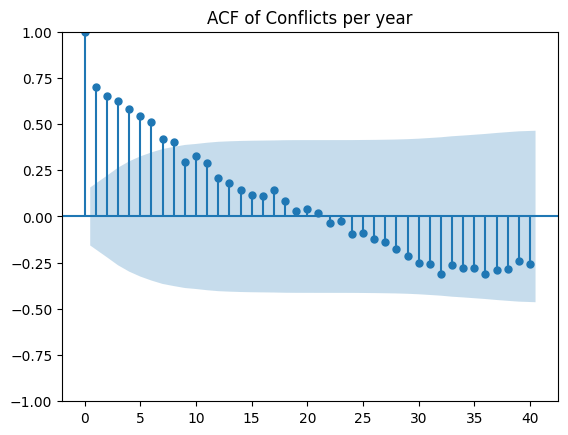

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF of Apple closing prices
plt.figure(figsize=(8, 5))
plot_acf(df_clean['count'], lags=40)
plt.title("ACF of Conflicts per year")
plt.show()

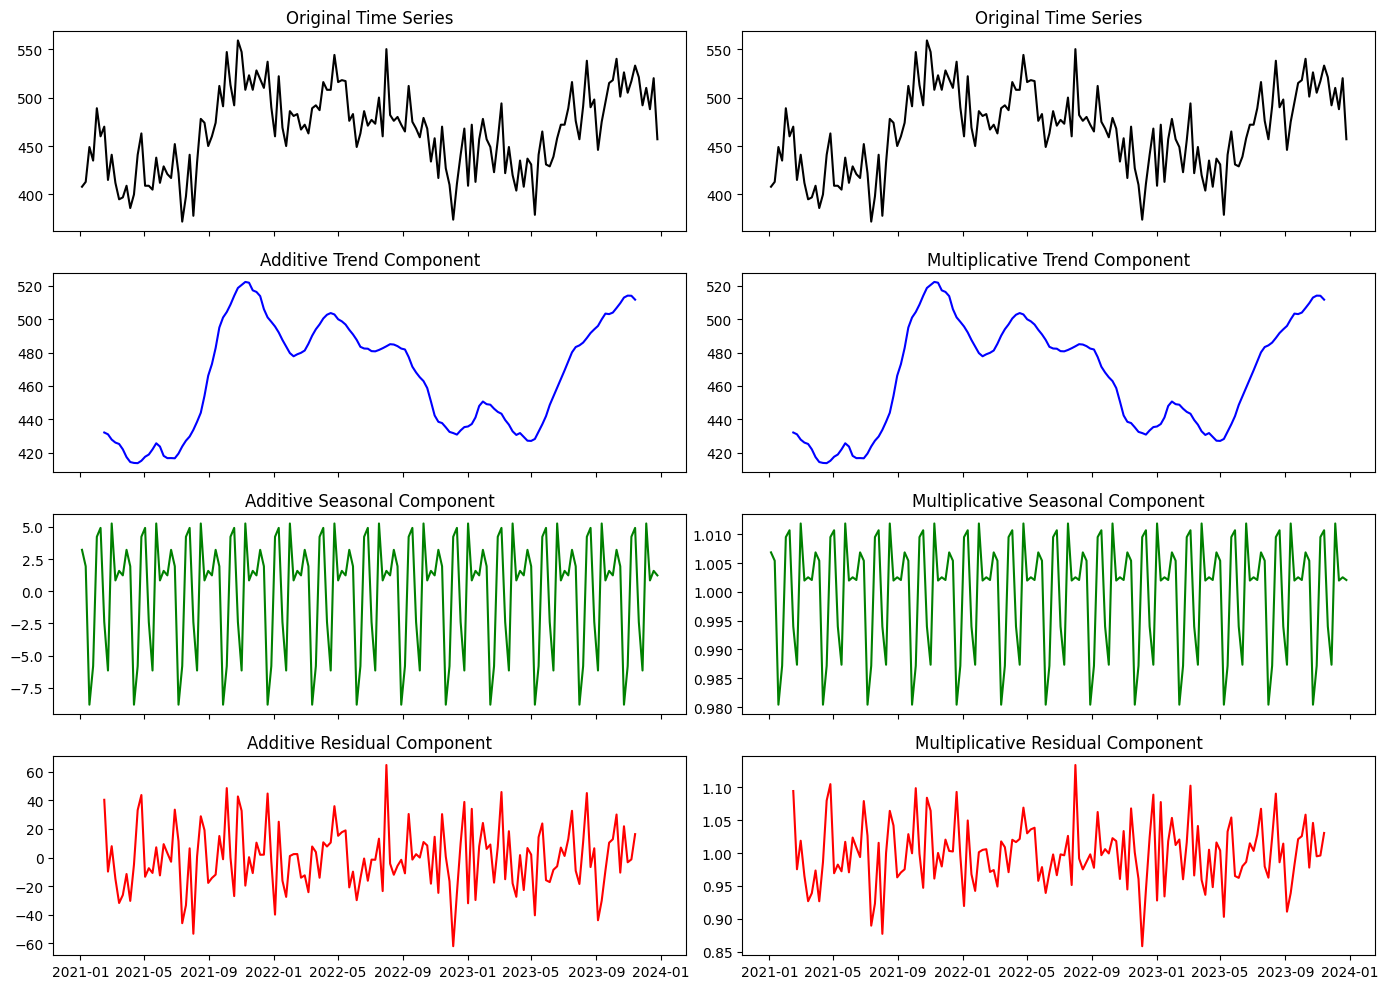

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(df_clean["count"], model="additive", period=12)
multiplicative_decomposition = seasonal_decompose(df_clean["count"], model="multiplicative", period=12)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(df_clean.index, df_clean["count"], color="black")
axes[0, 0].set_title("Original Time Series")

axes[1, 0].plot(df_clean.index, additive_decomposition.trend, color="blue")
axes[1, 0].set_title("Additive Trend Component")

axes[2, 0].plot(df_clean.index, additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("Additive Seasonal Component")

axes[3, 0].plot(df_clean.index, additive_decomposition.resid, color="red")
axes[3, 0].set_title("Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(df_clean.index, df_clean["count"], color="black")
axes[0, 1].set_title("Original Time Series")

axes[1, 1].plot(df_clean.index, multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("Multiplicative Trend Component")

axes[2, 1].plot(df_clean.index, multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("Multiplicative Seasonal Component")

axes[3, 1].plot(df_clean.index, multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("Multiplicative Residual Component")

plt.tight_layout()
plt.show()

In [15]:
# --- Perform ADF Test on Residuals (Assuming Additive is Best) ---
residuals = additive_decomposition.resid.dropna()
adf_result = adfuller(residuals)

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

ADF Statistic: -11.9883
p-value: 0.0000


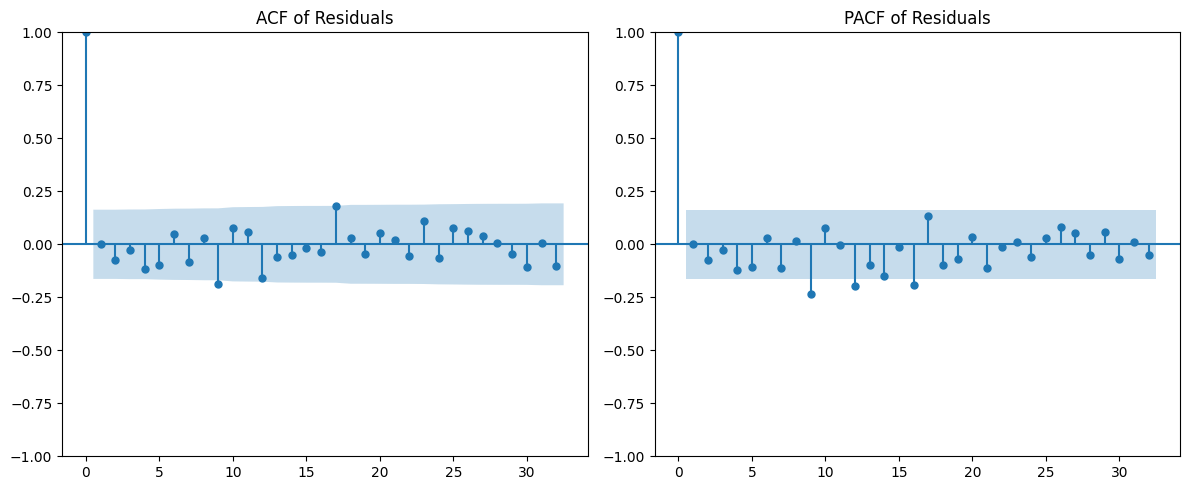

In [16]:
# ---  ACF and PACF Plots of Residuals ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot
plot_acf(residuals, lags=32, ax=axes[0])
axes[0].set_title("ACF of Residuals")

# PACF plot
plot_pacf(residuals, lags=32, ax=axes[1])
axes[1].set_title("PACF of Residuals")

plt.tight_layout()
plt.show()

In [17]:
# --- Perform Ljung-Box Test ---
ljungbox_result = acorr_ljungbox(residuals, lags=[20], return_df=True)
p_value_ljungbox = ljungbox_result["lb_pvalue"].values[0]

print(f"Ljung-Box p-value: {p_value_ljungbox:.4f}")
print("Tests if data is whitenoise (if it is then no correllation) low p = not whitenoise")

Ljung-Box p-value: 0.2296
Tests if data is whitenoise (if it is then no correllation) low p = not whitenoise


In [27]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure the index is datetime
df_clean.index = pd.to_datetime(df_clean.index)

# Train-test split: Exclude the last 12 weeks for training
train_data = df_clean.iloc[:-12]  # All but the last 12 weeks
test_data = df_clean.iloc[-12:]   # Last 12 weeks for testing

# Fit Holt-Winters Exponential Smoothing model
hw_model = ExponentialSmoothing(
    train_data["count"],  # Use the "count" column
    trend="add",          # Additive trend
    seasonal="add",       # Additive seasonality
    seasonal_periods=52   # 52 weeks in a year (for weekly data)
).fit()

# Forecast the next 12 weeks
forecast_values = hw_model.forecast(steps=12)

# Estimate confidence intervals using residual standard deviation
residuals = train_data["count"] - hw_model.fittedvalues
std_dev = np.std(residuals)
confidence_interval = 1.96 * std_dev  # 95% Confidence Interval

# Convert forecasted values to a Pandas Series with correct weekly index
forecast_series = pd.Series(forecast_values.values, index=test_data.index)

# Select the last 2 years of actual data for plotting
df_last2years = df_clean.iloc[-104:]  # Show last 104 weeks (2 years)

# Create the figure
fig = go.Figure()

# **1. Actual Data - Blue Line**
fig.add_trace(go.Scatter(
    x=df_last2years.index,
    y=df_last2years["count"],
    mode='lines',
    name='Actual Vehicle Thefts',
    line=dict(color='blue')
))

# **2. Forecasted Data - Red Dashed Line**
fig.add_trace(go.Scatter(
    x=forecast_series.index,
    y=forecast_series,
    mode='lines',
    name='Holt-Winters Forecast',
    line=dict(color='red', dash='dash')
))

# **3. Confidence Interval - Shaded Region**
fig.add_trace(go.Scatter(
    x=forecast_series.index.tolist() + forecast_series.index[::-1].tolist(),
    y=(forecast_series + confidence_interval).tolist() + (forecast_series - confidence_interval)[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.2)',  # Light red shading
    line=dict(color='rgba(255,255,255,0)'),
    name='95% Confidence Interval'
))

# **Customize Layout**
fig.update_layout(
    title="Holt-Winters Forecast for Weekly Vehicle Thefts (Last 2 Years Shown)",
    xaxis_title="Date (Weeks)",
    yaxis_title="Number of Vehicle Thefts",
    template="plotly_dark",
    xaxis=dict(
        tickformat="%b %Y",  # Show month & year on X-axis
        tickangle=45,        # Rotate labels
        tickmode="auto"
    ),
    yaxis=dict(showgrid=True),
    hovermode="x unified"  # Show all values on hover
)

# Show the plot
fig.show()

c:\Users\SABIO\Documents\GitHub\Operations-Management-Group-Project-1\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



## Data seperated monthly

In [24]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [25]:
monthly_counts = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN'].groupby(['year', 'month'])['Crm Cd Desc'].count()

In [26]:
monthly_counts = monthly_counts.reset_index()
# Rename columns for clarity
monthly_counts.columns = ['year', 'month', 'count']

# Create a proper datetime index
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

# Set 'date' as the index
monthly_counts = monthly_counts.set_index('date')

# Drop unnecessary columns
monthly_counts = monthly_counts.drop(columns=['year', 'month'])

# Display the transformed DataFrame
print(monthly_counts)

            count
date             
2020-01-01   1409
2020-02-01   1281
2020-03-01   1477
2020-04-01   1838
2020-05-01   1848
...           ...
2024-10-01   1817
2024-11-01   1643
2024-12-01    715
2025-01-01     18
2025-02-01      8

[62 rows x 1 columns]


In [ ]:
monthly_counts_total = monthly_counts.copy()

monthly_counts = monthly_counts[monthly_counts.index < '2024-01-12'] # Remove 2025 data

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = monthly_counts.index, y = monthly_counts['count'], mode = 'lines'))

fig.update_layout(title = 'Monthly Vehicle Thefts in Los Angeles',
                  xaxis_title = 'Date (Months)',
                  yaxis_title = 'Number of Vehicle Thefts',
                  template = 'plotly_dark')

fig.show()